<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Creating a Slack Builder Class

In [0]:
#| echo: false
#| output: asis
show_doc(BlockBuilder)

---

[source](https://github.com/Datatistics/tk_slack/blob/main/tk_slack/block_builder.py#L14){target="_blank" style="float:right; font-size:smaller"}

### BlockBuilder

>      BlockBuilder ()

*Utility class for building Slack Block Kit elements.
Provides methods to create various block types for Slack messages.*

First, let's start at the top of the message, which would be the message's header:

In [0]:
#| echo: false
#| output: asis
show_doc(BlockBuilder.create_header_block)

---

[source](https://github.com/Datatistics/tk_slack/blob/main/tk_slack/block_builder.py#L24){target="_blank" style="float:right; font-size:smaller"}

### BlockBuilder.create_header_block

>      BlockBuilder.create_header_block (text:str)

*Create a header block for Slack messages.

Args:
    text: The text to display in the header

Returns:
    Slack block kit header object*

In [ ]:
test_eq(BlockBuilder.create_header_block('My Text'),{'type': 'header',
 'text': {'type': 'plain_text', 'text': 'My Text', 'emoji': True}})

BlockBuilder.create_header_block('My Text')

{'type': 'header',
 'text': {'type': 'plain_text', 'text': 'My Text', 'emoji': True}}

That looks correct!

Now, what about making the various sections in our message? We basically just need another simple method that takes in the section text and outputs the right formating for the Slack API

In [0]:
#| echo: false
#| output: asis
show_doc(BlockBuilder.create_section_block)

---

[source](https://github.com/Datatistics/tk_slack/blob/main/tk_slack/block_builder.py#L44){target="_blank" style="float:right; font-size:smaller"}

### BlockBuilder.create_section_block

>      BlockBuilder.create_section_block (text:str,
>                                         fields:Optional[List[Dict[str,Any]]]=N
>                                         one)

*Create a section block for Slack messages.

Args:
    text: The text to display in the section
    fields: Optional list of field objects for the section

Returns:
    Slack block kit section object*

In [ ]:
test_eq(BlockBuilder.create_section_block('My Section'),{'type': 'section', 'text': {'type': 'mrkdwn', 'text': 'My Section'}}
)

BlockBuilder.create_section_block('My Section')

{'type': 'section', 'text': {'type': 'mrkdwn', 'text': 'My Section'}}

OR, if we want the section to have some detial fields:

In [ ]:
test_eq(BlockBuilder.create_section_block('My Section',['Some Field here']),
        {'type': 'section','text': {'type': 'mrkdwn', 'text': 'My Section'},'fields': ['Some Field here']})


BlockBuilder.create_section_block('My Section',['Some Field here'])

{'type': 'section',
 'text': {'type': 'mrkdwn', 'text': 'My Section'},
 'fields': ['Some Field here']}

Perfect! I guess we should should actually make a way to make fields then:

In [0]:
#| echo: false
#| output: asis
show_doc(BlockBuilder.create_field)

---

[source](https://github.com/Datatistics/tk_slack/blob/main/tk_slack/block_builder.py#L69){target="_blank" style="float:right; font-size:smaller"}

### BlockBuilder.create_field

>      BlockBuilder.create_field (title:str, value:str)

*Create a field for a section block.

Args:
    title: The title of the field (will be bolded)
    value: The value of the field

Returns:
    Field object for use in section blocks*

In [ ]:
test_eq(BlockBuilder.create_field('The Top, Important Part','Less important Part'),
        {'type': 'mrkdwn', 'text': '*The Top, Important Part*\nLess important Part'})

BlockBuilder.create_field('The Top, Important Part','Less important Part')

{'type': 'mrkdwn', 'text': '*The Top, Important Part*\nLess important Part'}

That would be used for things like `BlockBuilder.create_field(column_name,row_value)` to add the column details to the message

Now that we can make an individual field, let's make a way to take in multiple fields and turn them into a section since we'll often want to show the values for multiple columns:

In [0]:
#| echo: false
#| output: asis
show_doc(BlockBuilder.create_fields_section)

---

[source](https://github.com/Datatistics/tk_slack/blob/main/tk_slack/block_builder.py#L86){target="_blank" style="float:right; font-size:smaller"}

### BlockBuilder.create_fields_section

>      BlockBuilder.create_fields_section (fields_data:List[Tuple[str,str]],
>                                          max_fields_per_section:int=10)

*Create one or more section blocks with fields.

Args:
    fields_data: List of (label, value) tuples
    max_fields_per_section: Maximum fields per section (Slack limit is 10)

Returns:
    List of section blocks*

Let's pretend we are trying to make a section that has fiels for a center's billing rate and company status since we send some alerts that do that:

In [ ]:
BlockBuilder.create_fields_section([('Billing Rate','$13'),('Company Status','Advertiser')])

[{'type': 'section',
  'fields': [{'type': 'mrkdwn', 'text': '*Billing Rate*\n$13'},
   {'type': 'mrkdwn', 'text': '*Company Status*\nAdvertiser'}]}]

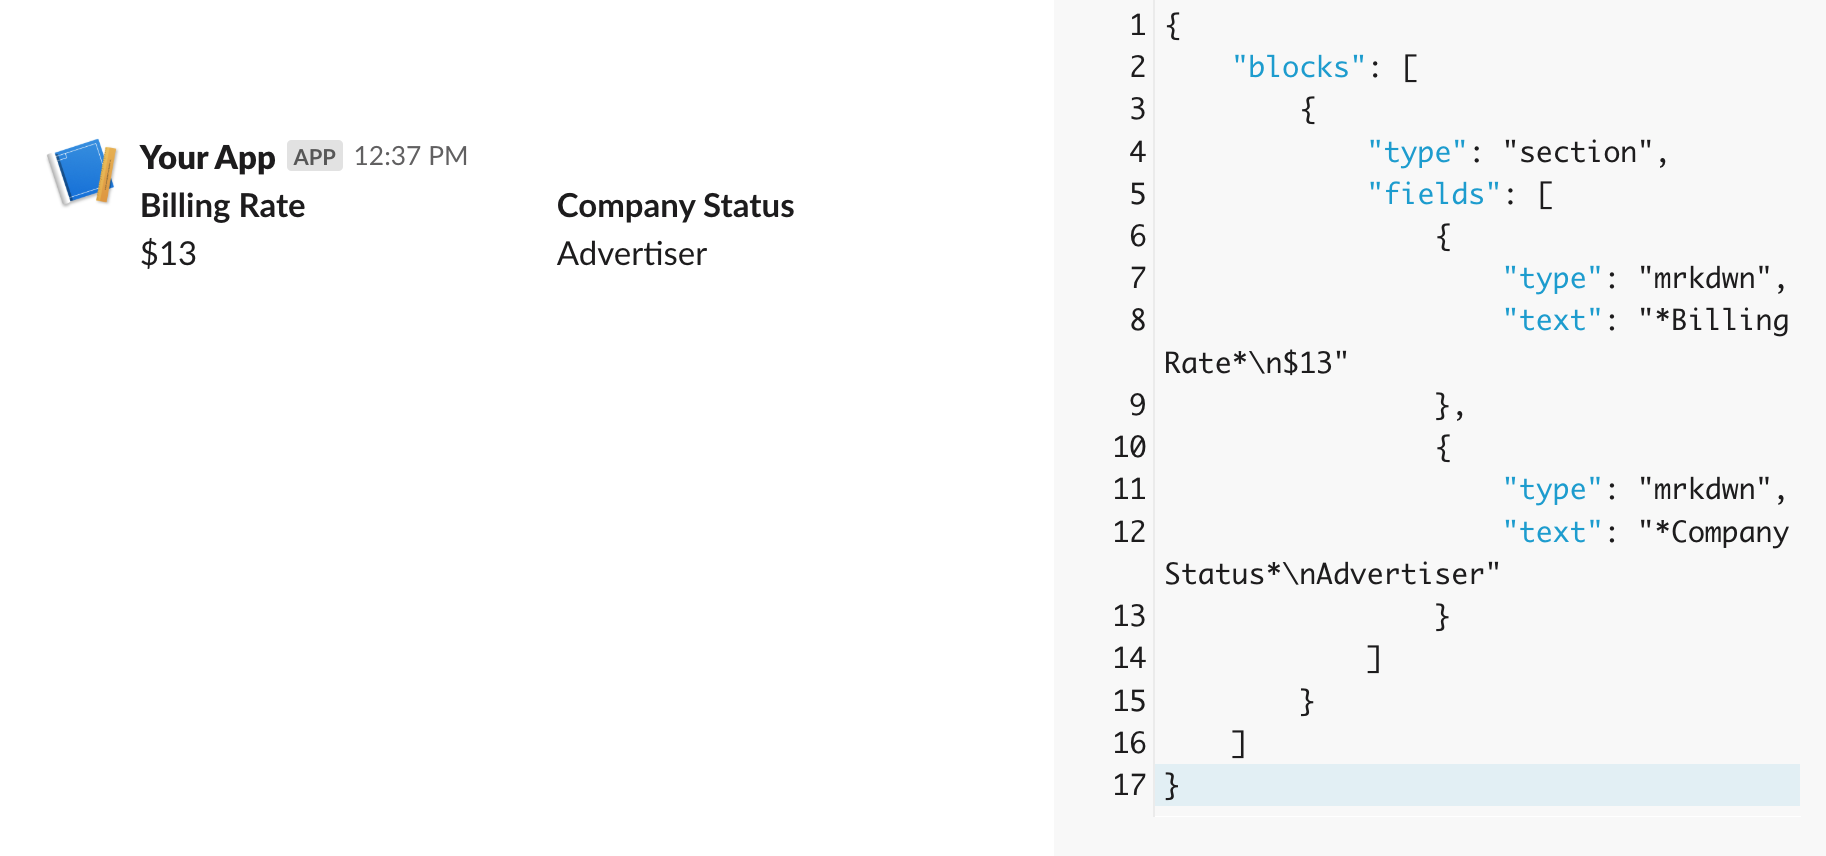

Wow, that looks great!

Let's also add a method for making context blocks since that is a subtle way to add text/information to a message.

In [0]:
#| echo: false
#| output: asis
show_doc(BlockBuilder.create_context_block)

---

[source](https://github.com/Datatistics/tk_slack/blob/main/tk_slack/block_builder.py#L120){target="_blank" style="float:right; font-size:smaller"}

### BlockBuilder.create_context_block

>      BlockBuilder.create_context_block (text:str)

*Create a context block for Slack messages.

Args:
    text: The text to show in the context block

Returns:
    Slack block kit context object*

In [ ]:
test_eq(BlockBuilder.create_context_block('Here is some informaiton'),{'type': 'context','elements': [{'type': 'mrkdwn', 'text': 'Here is some informaiton'}]})

BlockBuilder.create_context_block('Here is some informaiton')

{'type': 'context',
 'elements': [{'type': 'mrkdwn', 'text': 'Here is some informaiton'}]}

We also probably want a way to make dividers since those are always helpful for layout messages:

In [0]:
#| echo: false
#| output: asis
show_doc(BlockBuilder.create_divider)

---

[source](https://github.com/Datatistics/tk_slack/blob/main/tk_slack/block_builder.py#L141){target="_blank" style="float:right; font-size:smaller"}

### BlockBuilder.create_divider

>      BlockBuilder.create_divider ()

*Create a divider block for Slack messages.

Returns:
    Slack block kit divider object*

In [ ]:
test_eq(BlockBuilder.create_divider(),{'type': 'divider'})

BlockBuilder.create_divider()

{'type': 'divider'}

Since would like to allow users to add metadata to messages (which is helpful for processing the messages by the slack bot), let's also create a method for turning column values into message context:

In [0]:
#| echo: false
#| output: asis
show_doc(BlockBuilder.create_metadata_context)

---

[source](https://github.com/Datatistics/tk_slack/blob/main/tk_slack/block_builder.py#L151){target="_blank" style="float:right; font-size:smaller"}

### BlockBuilder.create_metadata_context

>      BlockBuilder.create_metadata_context
>                                            (metadata_items:List[Tuple[str,Unio
>                                            n[str,List,dict]]])

*Create a context block for metadata items.

Args:
    metadata_items: List of (label, value) tuples

Returns:
    Formatted metadata field*

In [ ]:
test_eq(
    BlockBuilder.create_metadata_context([('Sheet Owner','Mary'),
                                  ('Sheet Editors',['Joe','John','Bill']),
                                  ('Budfet',{'Shared':False,'Uses Parent':False,'individual_budget':9000})]),
    {'metadata': 
        {'Sheet Owner': 'Mary',
        'Sheet Editors': ['Joe', 'John', 'Bill'],
        'Budfet': {
            'Shared': False,
            'Uses Parent': False,
            'individual_budget': 9000}}})


BlockBuilder.create_metadata_context([('Sheet Owner','Mary'),
                                  ('Sheet Editors',['Joe','John','Bill']),
                                  ('Budfet',{'Shared':False,'Uses Parent':False,'individual_budget':9000})])

{'metadata': {'Sheet Owner': 'Mary',
  'Sheet Editors': ['Joe', 'John', 'Bill'],
  'Budfet': {'Shared': False,
   'Uses Parent': False,
   'individual_budget': 9000}}}